<img src='https://wizardsourcer.com/wp-content/uploads/2019/03/Stackoverflow.png'></img>

<center><h1> A Data Analysis using Stackoverflow’s 2019 and 2020 Annual Developer Survey.</h1></center>

## Each stage of the CRISP-DM process. These stages are:

1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results


# Business Understanding

In this notebook, I will be exploring the 2019 and 2020 Stack Overflow results in order to glean some information on professional developers and what to focus on to have the best career in India.

There will be three questions I will seek to answer in order to get this information:

1. What Programming Languages are most used to work and Which Programming Languages are most Required in Stackoverflow survey data of 2019 and 2020 ?
2. How does Programming Languages used at work relates with Programming Languages, People Wants to Learn in India According to Stackoverflow survey data of 2019 and 2020?
3. What are the most wanted Programming Languages in India According to Stackoverflow survey data of 2019 and 2020?

# Data Understanding

In order to gain some understanding of the data. I have to do these steps:
* Handle categorical and missing data
* Analyze, Model, and Visualize

In [1]:
# import python libraries to handle datasets
import numpy as np
import pandas as pd
from collections import Counter

#make plots
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# to display graphs in jupyter notebook
%matplotlib inline

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

from jupyterthemes import jtplot
jtplot.style(theme='onedork')

In [2]:
# Loading Stackoverflow survey data of 2019 and 2020
# Ref link: https://insights.stackoverflow.com/survey
df_2019 = pd.read_csv('developer_survey_2019/survey_results_public.csv')
df_2020 = pd.read_csv('developer_survey_2020/survey_results_public.csv')

In [3]:
#Little Exploration on Stackoverflow survey data of 2017
df_2019.sample(5)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
25514,25663,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Ukraine,No,Some college/university study without earning ...,Mathematics or statistics,"Taught yourself a new language, framework, or ...",20 to 99 employees,"Developer, front-end",8,17,8,Very satisfied,Very satisfied,Very confident,No,No,I am not interested in new job opportunities,Less than a year ago,Interview with people in peer roles,No,Office environment or company culture;Remote w...,I was preparing for a job search,UAH,Ukrainian hryvnia,1715000.0,Yearly,61853.0,32.0,There is a schedule and/or spec (made by me or...,Meetings,All or almost all the time (I'm full-time remote),Home,A little above average,"Yes, because I see value in code review",1.0,"Yes, it's not part of our process but the deve...",Developers typically have the most influence o...,I have some influence,Clojure;Dart;JavaScript;Kotlin,Clojure;Elixir,Firebase;MongoDB;SQLite,NaN,Android,Android,React.js;Other(s):,Other(s):,NaN,NaN,IntelliJ;Visual Studio Code,MacOS,"Outside of work, for personal projects",Not at all,NaN,Yes,SIGH,Yes,Twitter,In real life (in person),Username,2009,Less than once per month or monthly,Find answers to specific questions,Less than once per week,Stack Overflow was much faster,11-30 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech meetups or events in your area,27.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
12160,12217,"I am not primarily a developer, but I write co...",No,Never,NaN,Employed full-time,Canada,"Yes, full-time","Master’s degree (MA, MS, M.Eng., MBA, etc.)","A natural science (ex. biology, chemistry, phy...",Taken an online course in programming or softw...,NaN,Academic researcher;Scientist;Student,5,15,5,Slightly satisfied,Slightly satisfied,I don't have a manager,Not sure,NaN,I am not interested in new job opportunities,NaN,NaN,NaN,NaN,"Something else changed (education, award, medi...",CAD,Canadian dollar,22000.0,Yearly,16794.0,40.0,NaN,"Non-work commitments (parenting, school work, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sublime Text,Linux-based,NaN,Not at all,A passing fad,No,"Fortunately, someone else has that title",Yes,I don't use social media,In real life (in person),Username,2013,A few times per week,Find answers to specific questions;Pass the ti...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","No, not really",Just as welcome now as I felt last year,Courses on technologies you're interested in,24.0,Woman,No,Straight / Heterosexual,East Asian,No,Appropriate in length,Easy
39895,40142,I am a student who is learning to code,Yes,Once a m

In [4]:
df_2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [5]:
#Little Exploration on Stackoverflow survey data of 2018
df_2020.sample(5)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
58005,59145,I am a developer by profession,Yes,NaN,18,Monthly,NaN,NaN,Madagascar,Malagasy ariary,MGA,MongoDB;PostgreSQL;Redis,MongoDB,"Developer, front-end;Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,"I’m not actively looking, but I am open to new...",HTML/CSS;JavaScript;Python;TypeScript,HTML/CSS;JavaScript;TypeScript,React Native;TensorFlow,Node.js,Slack,"Github;Gitlab;Trello;Google Suite (Docs, Meet,...",No,Extremely important,Fairly important,Better compensation;Wanting to work with new t...,"Read company media, such as employee blogs or ...",Every few months,NaN,No,Yes,Rarely: 1-2 days per year or less,NaN,"Hello, old friend",Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Do other work and come ba...,Linux-based,10 to 19 employees,AWS,Linux;Windows,I have little or no influence,Straight / Heterosexual,Yes,Neutral,I have never participated in Q&A on Stack Over...,Daily or almost daily,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Gatsby;React.js,Angular;Express;React.js,Just as welcome now as I felt last year,40.0,7,3
32682,32802,I am a student who is learning to code,Yes,NaN,6,NaN,NaN,NaN,Italy,NaN,NaN,NaN,NaN,NaN,Primary/elementary school,Student,White or of European descent,Man,Flex time or a flexible schedule;Remote work o...,NaN,"I’m not actively looking, but I am open to new...",Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...,C;C#;HTML/CSS;Python,Unity 3D,Unity 3D;Unreal Engine,Github;Stack Overflow for Teams,NaN,NaN,NaN,NaN,NaN,NaN,Every few months,No,NaN,Yes,NaN,Start a free trial;Ask developers I know/work ...,"Hello, old friend",Stack Overflow (public Q&A for anyone who codes),Play games;Visit Stack Overflow;Watch help / t...,Linux-based,NaN,Android,Arduino;Windows,NaN,Bisexual,No,"No, not really",NaN,Daily or almost daily,Easy,Appropriate in length,No,NaN,Django;jQuery,Django,Somewhat more welcome now than last year,NaN,11,NaN
1553,1560,I am a developer by profession,Yes,33.0,Younger than 5 years,Yearly,107000.0,80925.0,Canada,Canadian dollar,CAD,PostgreSQL;SQLite,PostgreSQL;Redis;SQLite,"Developer, back-end;Developer, front-end;Devel...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Man,Remote work options;Office environment or comp...,Slightly satisfied,"I’m not actively looking, but I am open to new...",Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...,Ansible,Ansible;Node.js,"Github;Slack;Trello;Google Suite (Docs, Meet, ...","Jira;Github;Slack;Trello;Google Suite (Docs, M...",Yes,Extremely important,Very important,Having a bad day (or week or month) at work;Cu...,"Read company media, such as employee blogs or ...",Once a year,Yes,Onboarding? What onboarding?,Yes,Rarely: 1-2 days per year or less,Start a free trial;Read ratings or reviews on ...,Indifferent,Stack Overflow (public Q&A for anyone who code...,Play games;Call a coworker or friend;Visit Sta...,Linux-based,20 to 99 employees,Docker;Linux;Microsoft Azure;Raspberry Pi,AWS;Docker;Herok

In [6]:
df_2020.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

## Question 1: What Programming Languages are most used to work and Which Programming Languages are most Required in  Stackoverflow survey data of 2019 and 2020 ?

### Prepare Data

In [9]:
#First make copy of dataframe and then Filter a dataframe by country 
def filter_country(df, column_filter, country, columns): 
    '''
    Filter a dataframe by country(i.e. why i use dropna to drop all other country excpet India)
    Returns filtred dataframe
    '''
    
    df_copy = df
    
    for column in columns: 
        df_copy = df_copy[df_copy[column_filter] == country].dropna(subset=[column])
        
    return df_copy
# Filtering the dataframe 
india_2019 = filter_country(df_2019, 'Country', 'India', ['LanguageWorkedWith', 'LanguageDesireNextYear'])
india_2020 = filter_country(df_2020, 'Country', 'India', ['LanguageWorkedWith', 'LanguageDesireNextYear'])

In [10]:
#Spliting the columns
def split_column(df, column):
    '''
    Split column by ;,
    Returns a splited series.
    '''
    df_copy = df
    columnSeries = df_copy[column].apply(lambda x: x.split(';'))
    return columnSeries

# Splitting the dataframe by columns.
worked_languages_2019 = split_column(india_2019, 'LanguageWorkedWith')
wanted_languages_2019 = split_column(india_2019, 'LanguageWorkedWith')

worked_languages_2020 = split_column(india_2020, 'LanguageWorkedWith')
wanted_languages_2020 = split_column(india_2020, 'LanguageDesireNextYear')

In [11]:
#Just Flating a nested list
def flat(array_list):
    '''
    Flat a nested list,
    Returns a flat list.
    '''
    object_list = []
    for row in array_list:
        for obj in row:
            object_list.append(obj.strip())
            
    return object_list

# Flatting nested list objects.
list_worked_languages_2019 = flat(worked_languages_2019)
list_wanted_languages_2019 = flat(wanted_languages_2019)

list_worked_languages_2020 = flat(worked_languages_2020)
list_wanted_languages_2020 = flat(wanted_languages_2020)

In [12]:
def list_of_group(data_list, year):
    '''
    Group by count to a list,
    Returns a result dict
    '''
    grouped_list = dict(Counter(data_list))
    grouped_dict = [{'Programming Language':key, 'Count': value, 'Year': year} for key, value in grouped_list.items()]
    return grouped_dict

# Grouping the list and creating a dict.
dict_worked_languages_2019 = list_of_group(list_worked_languages_2019, '2019')
dict_wanted_languages_2019 = list_of_group(list_wanted_languages_2019, '2019')

dict_worked_languages_2020 = list_of_group(list_worked_languages_2020, '2020')
dict_wanted_languages_2020 = list_of_group(list_wanted_languages_2020, '2020')

### Data Modelling

In [13]:
#Ref: https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
def create_dataframe(data_dicts): 
    '''
    Create two dataframes and append them,
    Returns a appended dataframe.
    '''
    df1 = pd.DataFrame(data_dicts[0])
    df2 = pd.DataFrame(data_dicts[1])
    df = df1.append(df2)
    return df

worked_languages = create_dataframe([dict_worked_languages_2019, dict_worked_languages_2020])
wanted_languages = create_dataframe([dict_wanted_languages_2019, dict_wanted_languages_2020])

In [14]:
#Adding Percentage to worked_languages and wanted_languages dataframe
def percentage(df, column):
    '''
    Scale data,
    Returns data scaled.
    '''
    df_copy = df
    series = []
    for val in df_copy[column].unique():
        series.append(df_copy[df_copy[column] == val]['Count'] / 
                        df_copy[df_copy[column] == val]['Count'].sum())
    
    joined = pd.Series()
    for i_series in series:
        joined = joined.append(i_series)
        
    return joined

worked_languages['Percentage'] = percentage(worked_languages, 'Year')
wanted_languages['Percentage'] = percentage(wanted_languages, 'Year')

In [15]:
# Get the top 12 languages
top_12_work = worked_languages.sort_values(by=['Percentage'], ascending=False).head(12)['Programming Language'].unique()
top_12_want = wanted_languages.sort_values(by=['Percentage'], ascending=False).head(12)['Programming Language'].unique()

worked_chart = worked_languages[worked_languages['Programming Language'].isin(top_12_work)]
wanted_chart = wanted_languages[wanted_languages['Programming Language'].isin(top_12_want)]

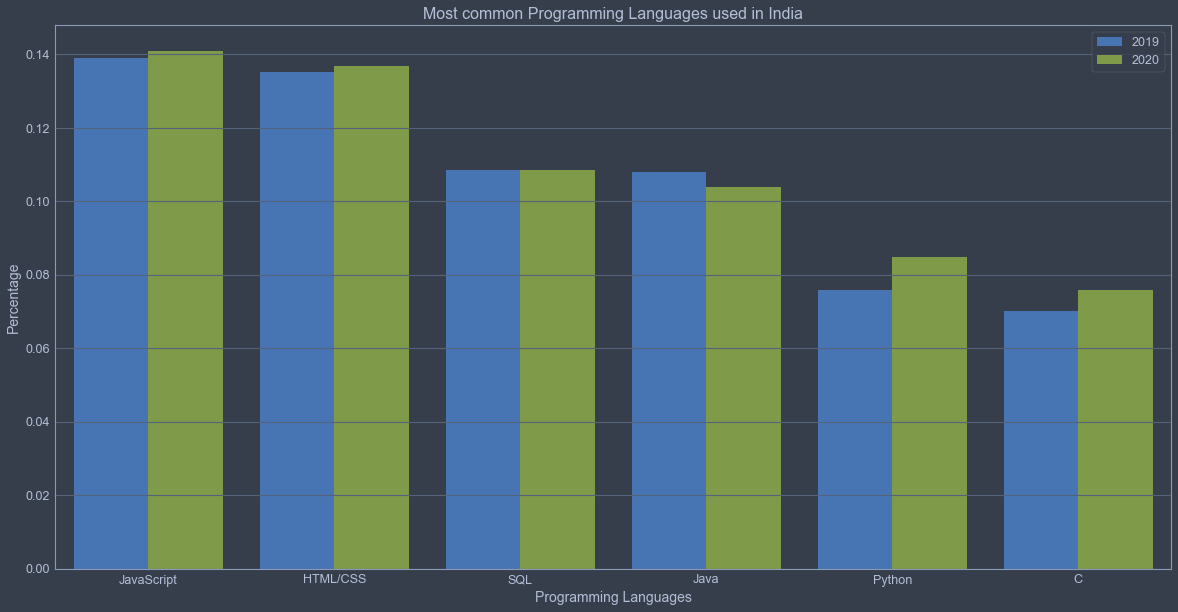

In [16]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'Programming Language', 
            y = 'Percentage',
            hue = 'Year',
            data = worked_chart.sort_values(by='Percentage', ascending=False))

plt.xlabel("Programming Languages", fontsize = 14)
plt.ylabel("Percentage", fontsize = 14)
plt.legend(title_fontsize='40')
plt.title('Most common Programming Languages used in India', size = 16)
plt.show()

## Evaluate the Results

* The Highest Rate of percentage among all Programming Languages JavaScript have highest growth rate in 2019 which is around 16% whereas this percentage is drop significantly in 2020 about 4% in India.
* As we can see through Graph, Java has same drop percentage about 4% in India.
* The Most Intersting this about this Graph is `HTML and CSS` it was probably not possible to select these two Languages as option in 2019 whereas in 2020 these two Programming Languages have risen such as `HTML and CSS`.

## Question 2: How does Programming Languages used at work relates with Programming Languages, People Wants to Learn in India According to Stackoverflow survey data of 2019 and 2020?

### Prepare Data

In [17]:
row = []
for j in list(zip(worked_languages_2020, wanted_languages_2020)):
    for i in j[0]:
        row.append({
            'Worked_Programming_Languages': i, 
            'Wanted_Programming_Languages': Counter(j[0])
        })
        
programming_language_transition = pd.DataFrame(row).groupby('Worked_Programming_Languages')\
                                            .agg({'Wanted_Programming_Languages': 'sum'}).reset_index()

### Data Modeling

In [18]:
for row in programming_language_transition['Worked_Programming_Languages']:
    programming_language_transition[row] = 0

for index, row in programming_language_transition.iterrows():
    total = sum([value for key, value in dict(row['Wanted_Programming_Languages']).items()])
    for key, value in dict(row['Wanted_Programming_Languages']).items():
         programming_language_transition[key].loc[index] = (value / total)

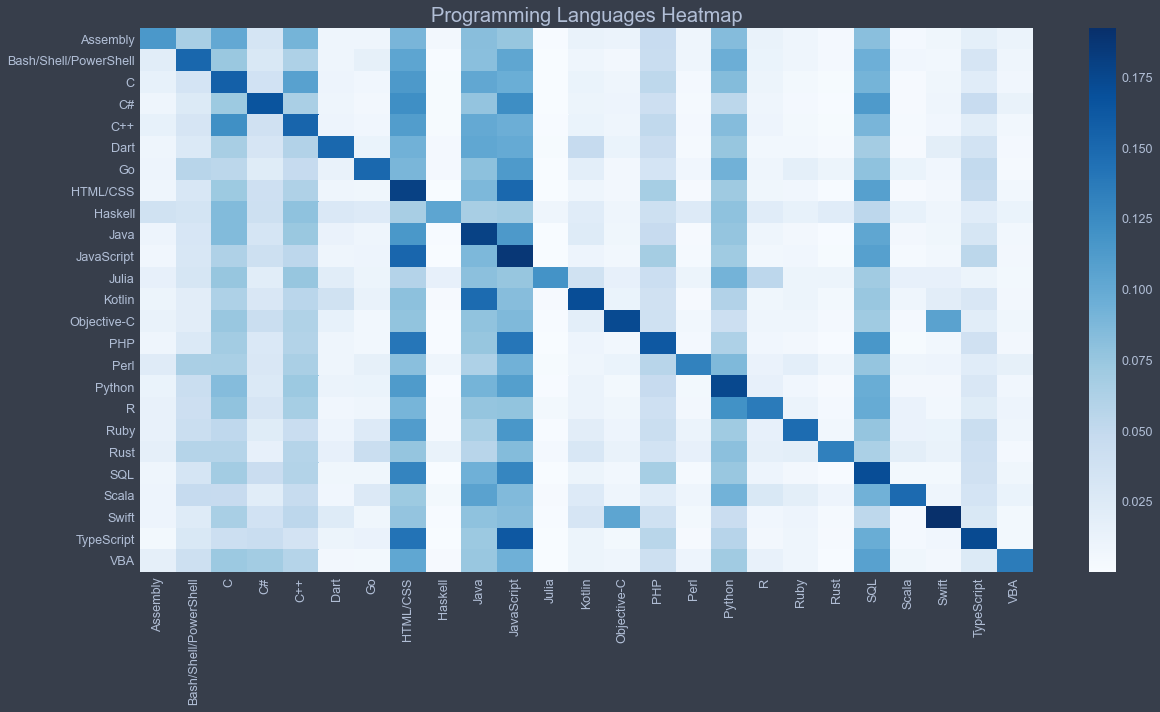

In [19]:
prlt = programming_language_transition.drop('Wanted_Programming_Languages', axis=1)\
                                        .set_index('Worked_Programming_Languages')

plt.figure(figsize=(20, 10))
sns.heatmap(prlt, cmap = "Blues")
plt.title('Programming Languages Heatmap', size = 20)
plt.ylabel('')
plt.show()

## Evaluate the Results

* With this Graph we can have some insights and they are:
  * `HTML` is highly correlated with every Programming Language (except: Rust, Ocaml, Julia, Hack, Haskell and Clojure) and `CSS` also have same trends like HTML.
  * There are around 25 Programming Language which has nearly no correlation among them with anyone.
  * `HTML` has strongest correlation between `CSS` and `JavaScript` (i.e. about `12% to 15%`).
  * There is one noticeable thing that `Objectice C` and `Swift` are strongly correlated with each other (i.e. about `10% to 12%`).

## Question 3: What are the most wanted Programming Languages in India According to Stackoverflow survey data of 2019 and 2020?

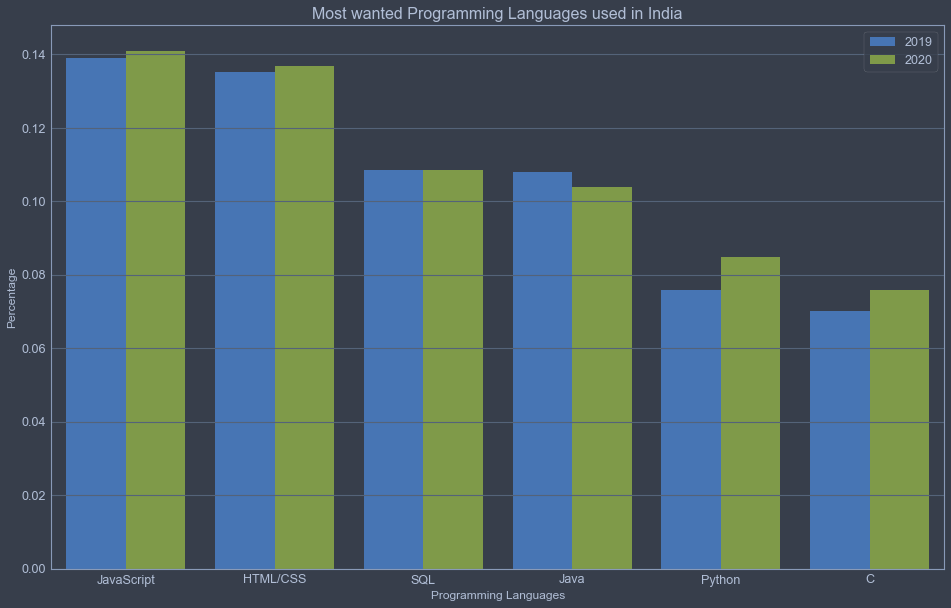

In [20]:
plt.figure(figsize=(16,10))
sns.barplot(x = 'Programming Language', 
            y = 'Percentage',
            hue = 'Year',
            data = worked_chart.sort_values(by='Percentage', ascending=False))

plt.title('Most wanted Programming Languages used in India', size = 16)
plt.xlabel("Programming Languages", fontsize = 12)
plt.ylabel("Percentage", fontsize = 12)
plt.legend(title_fontsize='40')
plt.show()

## Evaluate the Results

* Most of the programming languages that have appeared as programming languages most used at work, also appeared in the ranking of most wanted programming languages, this show us that are many people wanting to learn these languages.